# OISSTv2 sea surface temperatures (SST)

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
DATA_DIR = 'C:/Users/salvarc/data/oisstv2'

A netcdf file (.nc) usually contains multiple variables. In our case, it is only the SST variable.
As you can see below, the data comes at a 0.25 degree spatial resolution at a daily frequency.


In [4]:
ds = xr.open_dataset(DATA_DIR + '/sst.day.mean.2020.nc', decode_times=False, use_cftime=False)
ds

<xarray.Dataset>
Dimensions:  (time: 366, lat: 720, lon: 1440)
Coordinates:
  * time     (time) float64 8.035e+04 8.035e+04 ... 8.072e+04 8.072e+04
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:    CF-1.5
    title:          NOAA/NCEI 1/4 Degree Daily Optimum Interpolation Sea Surf...
    institution:    NOAA/National Centers for Environmental Information
    source:         NOAA/NCEI https://www.ncei.noaa.gov/data/sea-surface-temp...
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Daily Optimum Interpolation Sea Surface Temperature
    version:        Version 2.1
    comment:        Reynolds, et al.(2007) Daily High-Resolution-Blended Anal...

In [5]:
# You can access the variables in the dataset using same as a class attribute
ds.sst

<xarray.DataArray 'sst' (time: 366, lat: 720, lon: 1440)>
[379468800 values with dtype=float32]
Coordinates:
  * time     (time) float64 8.035e+04 8.035e+04 ... 8.072e+04 8.072e+04
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
Attributes:
    long_name:     Daily Sea Surface Temperature
    units:         degC
    valid_range:   [-3. 45.]
    precision:     2.0
    dataset:       NOAA High-resolution Blended Analysis
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Observations
    actual_range:  [-1.8      35.059998]

## Visualization
The package xarray has very convenient, built-in plotting functions.
Note: ``isel`` selects based on index, while ``sel`` selects on value.

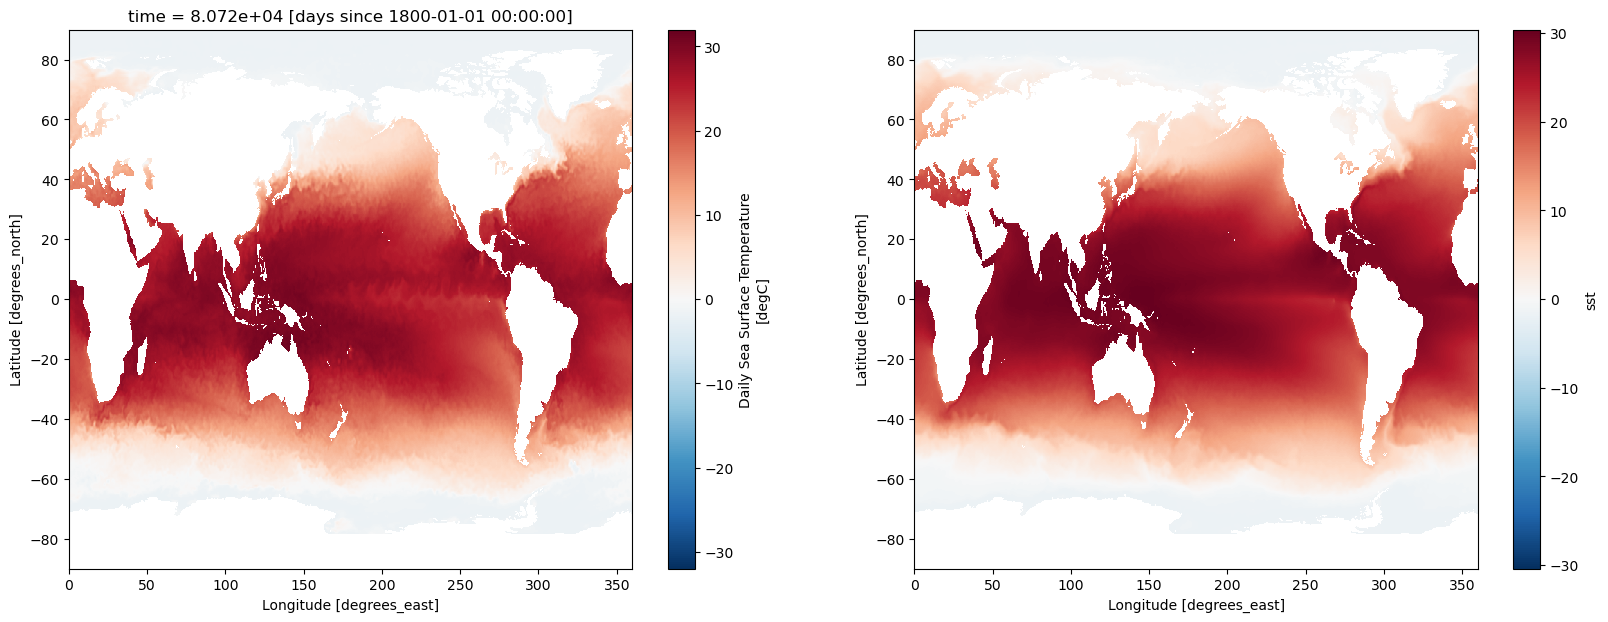

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))
# For example, here we plot
# 1: the SST for a specific day (the last one, in this case)
ds.sst.isel(time=-1).plot(x='lon', y='lat', cmap='RdBu_r', ax=ax[0])
# 2: the mean SST for the whole year
ds.sst.mean(dim='time').plot(x='lon', y='lat', cmap='RdBu_r', ax=ax[1])


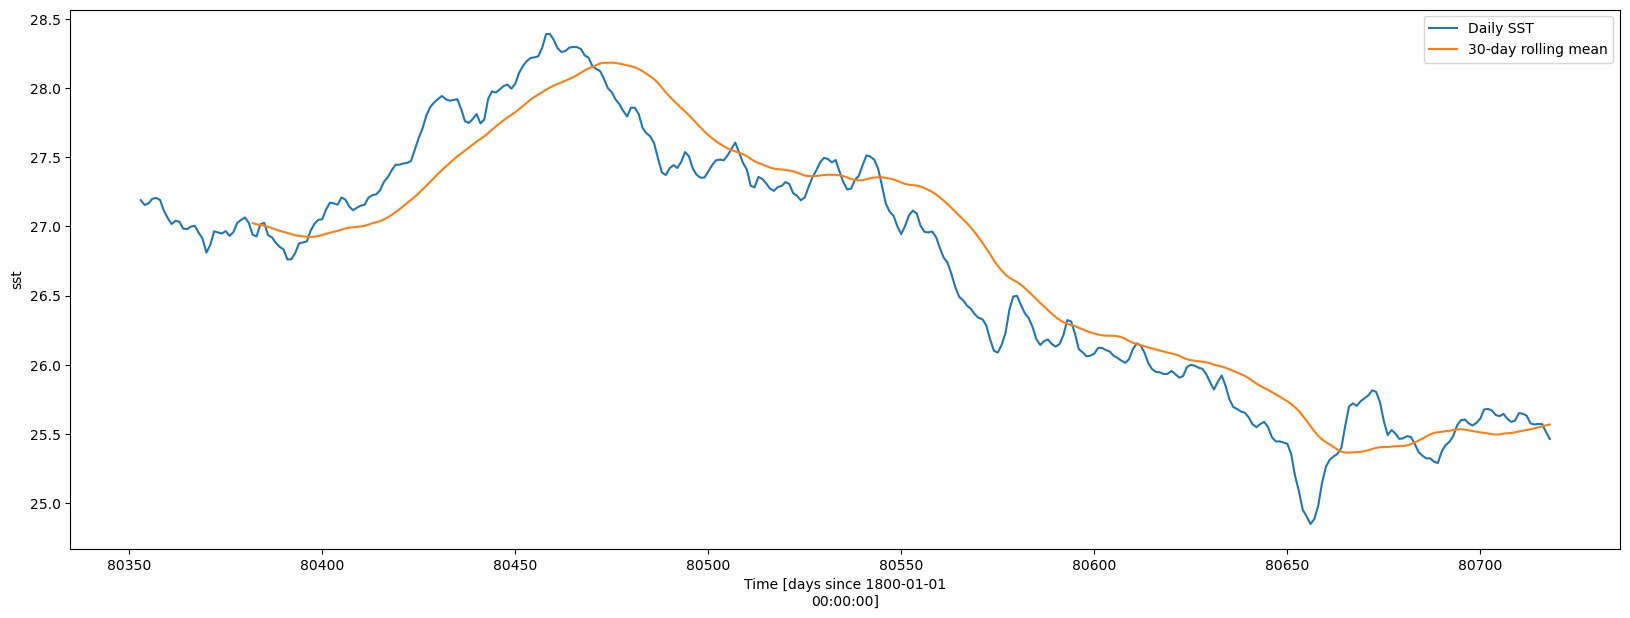

In [19]:
# You can also plot the time series for a specific lat-lon box (e.g. the el Nino3.4 region)
# Here we plot the daily box-average SST, as well a rolling mean over 30 consecutive days
fig, ax = plt.subplots(1, 1, figsize=(20, 7))
ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim=('lat', 'lon')).plot(ax=ax, label='Daily SST')
ds.sst.sel(lat=slice(-5, 5), lon=slice(190, 240)).mean(dim=('lat', 'lon')).rolling(time=30).mean().plot(ax=ax, label='30-day rolling mean')
ax.legend()

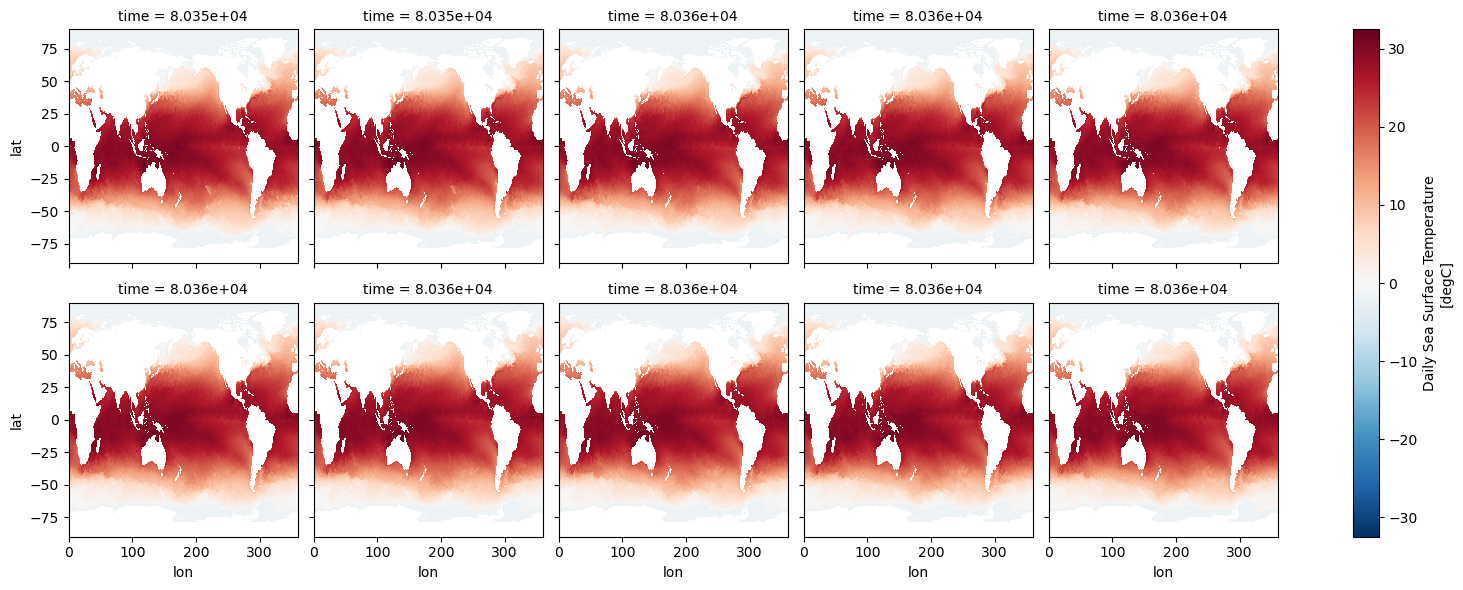

In [21]:
# Xarray also provides a easy way of visualizing multiple snapshots/timesteps at once
# Here we plot the SST for the first 10 days of the year
ds.sst.isel(time=slice(0, 10)).plot(x='lon', y='lat', col='time', col_wrap=5, cmap='RdBu_r')